In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats import binom
import seaborn as sns
import pylab

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
loans_income = pd.read_csv('/content/drive/MyDrive/FDS DataSets/loans_income.csv')


In [ ]:
sp500_px = pd.read_csv('/content/sample_data/sp500_px.csv')

In [ ]:
samples = loans_income.sample(n=1000)
samples

,x
37493,30000
2066,120000
36930,34000
20859,75000
45778,40320
...,...
40605,70000
40845,108240
27683,42000
7477,85000


In [ ]:
samples.head

<bound method NDFrame.head of             x
37493   30000
2066   120000
36930   34000
20859   75000
45778   40320
...       ...
40605   70000
40845  108240
27683   42000
7477    85000
48661   21600

[1000 rows x 1 columns]>

In [ ]:
samples.tail

<bound method NDFrame.tail of             x
37493   30000
2066   120000
36930   34000
20859   75000
45778   40320
...       ...
40605   70000
40845  108240
27683   42000
7477    85000
48661   21600

[1000 rows x 1 columns]>

In [ ]:
sample_mean_5 = samples.rolling(5).mean().x
sample_mean_5

37493        NaN
2066         NaN
36930        NaN
20859        NaN
45778    59864.0
          ...   
40605    70438.0
40845    85086.0
27683    78486.0
7477     80248.0
48661    65368.0
Name: x, Length: 1000, dtype: float64

In [ ]:
sample_mean_5 = sample_mean_5.dropna()
sample_mean_5

45778    59864.0
14326    70664.0
27866    68664.0
8516     76864.0
7823     75864.0
          ...   
40605    70438.0
40845    85086.0
27683    78486.0
7477     80248.0
48661    65368.0
Name: x, Length: 996, dtype: float64

In [ ]:
sample_mean_20 = samples.rolling(20).mean().x
sample_mean_20 

37493        NaN
2066         NaN
36930        NaN
20859        NaN
45778        NaN
          ...   
40605    69789.5
40845    71051.5
27683    70551.5
7477     72451.5
48661    69381.5
Name: x, Length: 1000, dtype: float64

In [ ]:
sample_mean_20 = sample_mean_20.dropna()
sample_mean_20 

30350    71720.5
7450     75620.5
11242    71720.5
11077    74270.5
46667    74520.5
          ...   
40605    69789.5
40845    71051.5
27683    70551.5
7477     72451.5
48661    69381.5
Name: x, Length: 981, dtype: float64

In [ ]:
sample_mean_30 = samples.rolling(30).mean().x
sample_mean_30

37493             NaN
2066              NaN
36930             NaN
20859             NaN
45778             NaN
             ...     
40605    69723.000000
40845    67497.666667
27683    67377.666667
7477     66794.333333
48661    66247.666667
Name: x, Length: 1000, dtype: float64

In [ ]:
sample_mean_30 = sample_mean_30.dropna()
sample_mean_30

28667    75742.733333
19254    78076.066667
17415    75909.400000
47938    78240.600000
21990    78907.266667
             ...     
40605    69723.000000
40845    67497.666667
27683    67377.666667
7477     66794.333333
48661    66247.666667
Name: x, Length: 971, dtype: float64

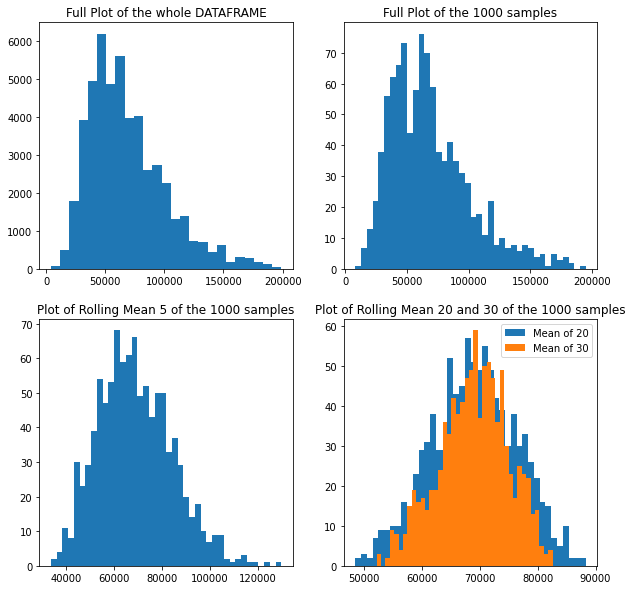

In [ ]:
fig = plt.figure(figsize=(10,10))
#The full distribution of the plot:
ax = fig.add_subplot(2,2,1)
ax.hist(loans_income.x,bins=25)
plt.title('Full Plot of the whole DATAFRAME')
ax = fig.add_subplot(2,2,2)
ax.hist(samples.x,bins=40)
plt.title('Full Plot of the 1000 samples')

#distribution of means of 5 numbers from 1000 samples:
ax = fig.add_subplot(2,2,3)
ax.hist(sample_mean_5,bins=40)
plt.title('Plot of Rolling Mean 5 of the 1000 samples')

#distribution of means of 20 numbers from 1000 samples:
ax = fig.add_subplot(2,2,4)
ax.hist(sample_mean_20,bins=40,label='Mean of 20')
ax.hist(sample_mean_30,bins=40,label='Mean of 30')
plt.title('Plot of Rolling Mean 20 and 30 of the 1000 samples')
ax.legend()
plt.show()

plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently

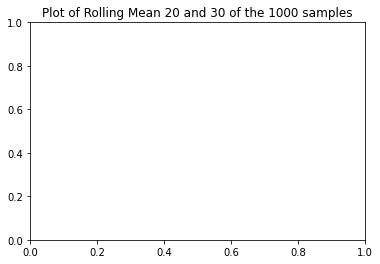

In [ ]:
#Calculating a rolling mean:
print('Total Population STD : ',loans_income.x.std())
print('Total Population Mean : ',loans_income.x.mean())
print('Total Population Median : ',np.median(loans_income.x))
print('Total Population Standard Error:',stats.sem(loans_income.x, ddof=1))

Total Population STD :  32872.03536985002
Total Population Mean :  68760.51844
Total Population Median :  62000.0
Total Population Standard Error: 147.00821129152527


In [ ]:
bootstrap_1000 = np.random.choice(loans_income.x,size=1000,replace=True)
bootstrap_10000 = np.random.choice(loans_income.x,size=10000,replace=True)
bootstrap_20000 = np.random.choice(loans_income.x,size=20000,replace=True)

In [ ]:
bootstrap_1000

array([ 43000,  84660,  84012,  67000,  58000,  63750,  70000,  38756,
       148000, 157000,  85000,  32000,  54000,  74400,  50000,  61500,
        69500,  52000,  95000, 119000,  50000,  67000, 120000,  60825,
        39000,  38000,  38000,  42000, 140000,  67000,  48000,  66500,
        36000, 120000,  72000,  95000,  54000,  52500,  34000,  55000,
        75000,  80000,  40000,  71000,  40000,  80000, 120000, 120000,
        60000,  70000,  42000,  90000,  55000,  80000,  46100,  80000,
        75000,  40000,  30000,  45000, 111000,  30000,  45000, 100000,
        70000,  68000, 124000,  65000,  47300,  36000,  35490,  74098,
        74000,  60000,  99135,  65000,  48000,  21000,  76000,  18720,
        32640,  70000,  40000,  60000, 115000,  65000,  35000,  50000,
        58760,  55000, 125016,  56000,  30000, 147000,  30000,  50715,
        28993,  60000,  21000,  27000,  65000,  16000,  60000,  91000,
        16000,  45672,  60000,  80000,  55000,  19500,  70000,  40000,
      

In [ ]:
bootstrap_10000.shape

(10000,)

In [ ]:
arr_bootstraps = [bootstrap_1000,bootstrap_10000,bootstrap_20000]
len(arr_bootstraps)

3

In [ ]:
#Calculating a rolling mean:
for i in range(len(arr_bootstraps)):
    print('Bootstrap Stats for {} examples \n'.format(len(arr_bootstraps[i])))
    print('------------------------------------------------------------------------------\n')
    print('Bootstrap STD : ',np.std(arr_bootstraps[i],ddof=1))
    print('Bootstrap Mean : ',np.mean(arr_bootstraps[i]))
    print('Bootstrap Median: ',np.median(arr_bootstraps[i]))
    print('Boostrap Bias, ',loans_income.x.mean() - np.mean(arr_bootstraps[i],axis=0))
    print('Standard Error:',stats.sem(arr_bootstraps[i], ddof=1))
    print('\n------------------------------------------------------------------------------\n')


Bootstrap Stats for 1000 examples 

------------------------------------------------------------------------------

Bootstrap STD :  34247.27808815806
Bootstrap Mean :  68454.896
Bootstrap Median:  60000.0
Boostrap Bias,  305.62244000000646
Standard Error: 1082.9940241975628

------------------------------------------------------------------------------

Bootstrap Stats for 10000 examples 

------------------------------------------------------------------------------

Bootstrap STD :  33398.97544233639
Bootstrap Mean :  69293.8468
Bootstrap Median:  62400.0
Boostrap Bias,  -533.3283599999995
Standard Error: 333.98975442336393

------------------------------------------------------------------------------

Bootstrap Stats for 20000 examples 

------------------------------------------------------------------------------

Bootstrap STD :  32948.70165810502
Bootstrap Mean :  68590.73735
Bootstrap Median:  62000.0
Boostrap Bias,  169.78109000000404
Standard Error: 232.982503737385

------

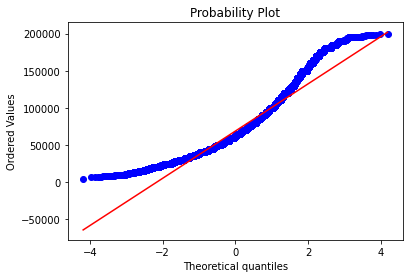

In [ ]:
stats.probplot(loans_income.x, dist="norm", plot=pylab)
pylab.show()

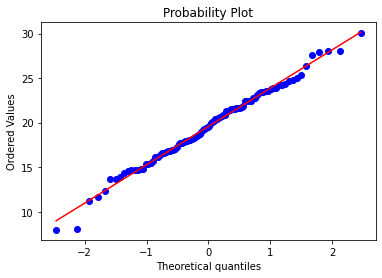

In [ ]:
measurements = np.random.normal(loc = 20, scale = 5, size=100)   
stats.probplot(measurements, dist="norm", plot=pylab)
pylab.show()

In [ ]:
nflx = sp500_px.loc[:,'NFLX']

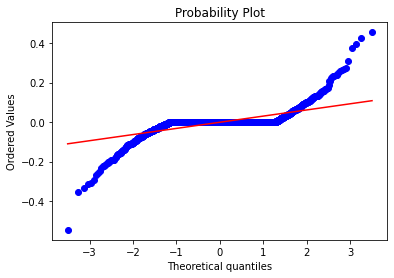

In [ ]:
stats.probplot(nflx, dist="norm", plot=pylab)
pylab.show()

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:1280: RuntimeWarning: invalid value encountered in subtract
  a = op(a[slice1], a[slice2])


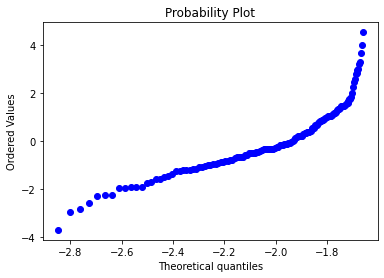

In [ ]:
treated_nflx = np.diff(np.log(nflx))
stats.probplot(treated_nflx, dist="norm", plot=pylab,fit=True)
pylab.show()